In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
!pip install --upgrade threadpoolctl 


In [2]:
import threadpoolctl
print(threadpoolctl.__version__)

3.1.0


In [3]:
dataset = pd.read_csv("C:\\Users\\Awais Khan\\Desktop\\Data_Files\\Student Datasets\\KMeans.csv")

In [4]:
dataset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [5]:
features = dataset.iloc[:,[1,2]].values    


In [6]:
# Using the elbow method to find the optium number of clusters

In [7]:
wcss = []        # A list to store values of distance of clusters in square sums

C:\Users\Awais Khan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Awais Khan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Awais Khan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Awais Khan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a m

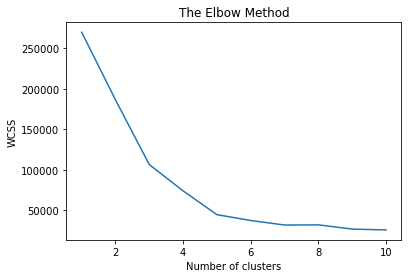

In [8]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, n_init = 'auto', init = 'k-means++', random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Fitting kmeans to the dataset

In [9]:
model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
target = model.fit(features)
target = model.predict(features)


C:\Users\Awais Khan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Awais Khan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
target

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [11]:
#  We have kind of transformed unsupervised learning into supervised learning
# We created target (Clusters) using features(Annual Income and Spending Scores)

#### Visualizing the clusters

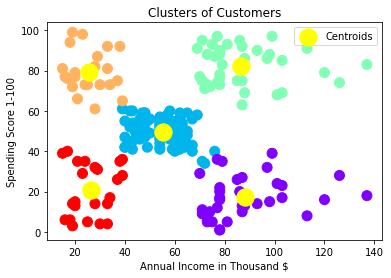

In [12]:

    
    centroids = model.cluster_centers_
    
    plt.scatter(features[:,0],features[:,1], s=100, c=target, cmap = 'rainbow')
    
    plt.scatter(centroids[:,0], centroids[:,1], s = 300, c= 'yellow',  label = 'Centroids')   # Marking Centroids
    
    plt.title('Clusters of Customers')
    plt.xlabel('Annual Income in Thousand $')
    plt.ylabel('Spending Score 1-100')
    plt.legend()
    plt.show() 